# Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from scipy.stats.mstats import winsorize

from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_gt.csv')

In [5]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12224,46,admin.,married,high.school,unknown,no,no,telephone,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,36387,32,admin.,married,university.degree,no,yes,yes,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,22703,36,technician,single,university.degree,no,no,no,cellular,aug,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,32742,30,services,single,high.school,no,yes,yes,cellular,may,...,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,40547,76,retired,divorced,basic.4y,no,no,no,cellular,aug,...,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes


# Data Exploration

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8238 non-null   int64  
 1   age             8238 non-null   int64  
 2   job             8238 non-null   object 
 3   marital         8238 non-null   object 
 4   education       8238 non-null   object 
 5   default         8238 non-null   object 
 6   housing         8238 non-null   object 
 7   loan            8238 non-null   object 
 8   contact         8238 non-null   object 
 9   month           8238 non-null   object 
 10  day_of_week     8238 non-null   object 
 11  campaign        8238 non-null   int64  
 12  pdays           8238 non-null   int64  
 13  previous        8238 non-null   int64  
 14  poutcome        8238 non-null   object 
 15  emp.var.rate    8238 non-null   float64
 16  cons.price.idx  8238 non-null   float64
 17  cons.conf.idx   8238 non-null   f

In [8]:
# replace unknown values with nan
train_fixed=train.replace('unknown', np.nan, inplace=False)
train=train_fixed
print(train.isnull().sum(), '\n')

id                   0
age                  0
job                257
marital             62
education         1388
default           6853
housing            799
loan               799
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64 



In [9]:
# replace unknown values with nan
test_fixed=test.replace('unknown', np.nan, inplace=False)
test=test_fixed
print(test.isnull().sum(), '\n')

id                   0
age                  0
job                 73
marital             18
education          343
default           1744
housing            191
loan               191
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64 



# preprocessing

In [10]:
# check correlation between all numerical variables

train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

## explore outlier & remove outlier

### explore outlier with boxplot (numerical variable)

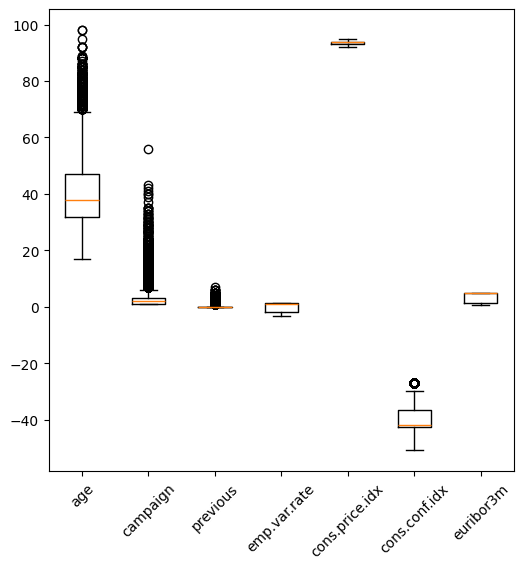

In [11]:
plt.figure(figsize = (6, 6))
plt.boxplot([train['age'], train['campaign'], train['previous'], train['emp.var.rate'], train['cons.price.idx'], train['cons.conf.idx'], train['euribor3m']])
plt.xticks(ticks = range(1, 8), labels = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], rotation = 45)
plt.show()

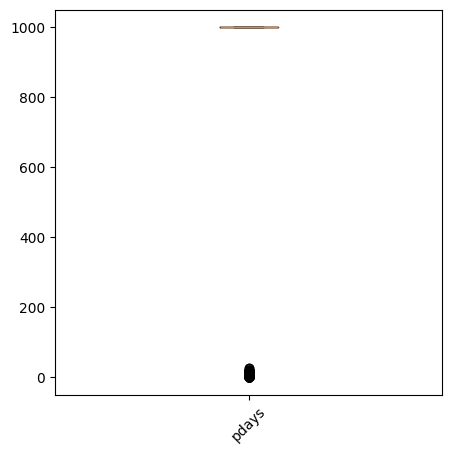

In [12]:
plt.figure(figsize = (5, 5))
plt.boxplot(train['pdays'])
plt.xticks(ticks = range(1, 2), labels = ['pdays'], rotation = 45)
plt.show()
# we have to drop pdays

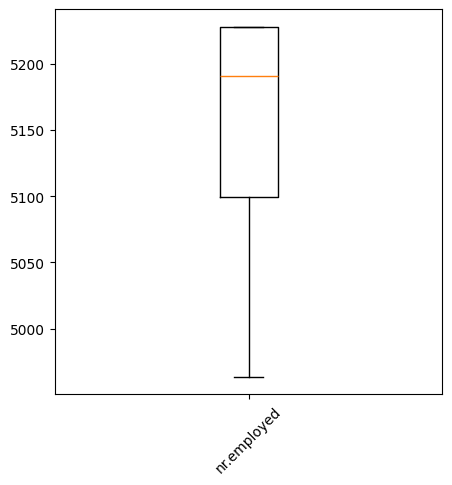

In [13]:
plt.figure(figsize = (5, 5))
plt.boxplot(train['nr.employed'])
plt.xticks(ticks = range(1, 2), labels = ['nr.employed'], rotation = 45)
plt.show()

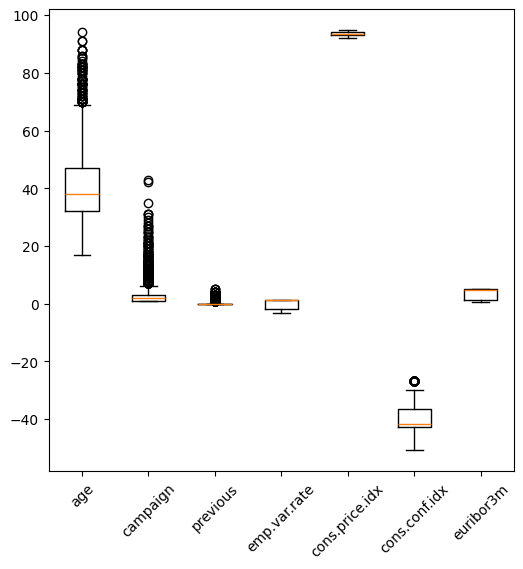

In [14]:
plt.figure(figsize = (6, 6))
plt.boxplot([test['age'], test['campaign'], test['previous'], test['emp.var.rate'], test['cons.price.idx'], test['cons.conf.idx'], test['euribor3m']])
plt.xticks(ticks = range(1, 8), labels = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], rotation = 45)
plt.show()

### remove outlier

In [15]:
def remove_outliers_box(data, columns):

    data_df = data.copy()

    for col in columns:

        Q1 = data_df[col].quantile(0.25)
        Q3 = data_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        max_value = data_df.loc[(data_df[col] >= lower_bound) & (data_df[col] <= upper_bound), col].max()
        data_df.loc[(data_df[col] <= lower_bound) | (data_df[col] >= upper_bound), col] = max_value

    return data_df

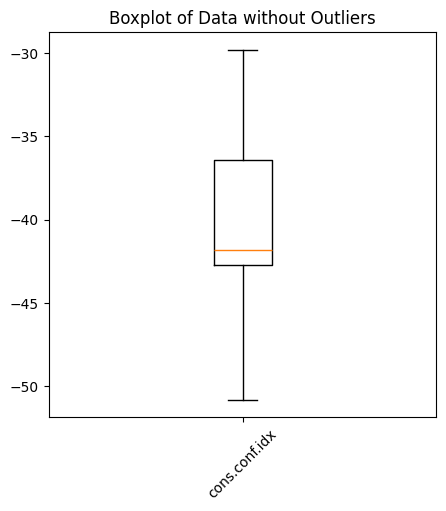

In [16]:
cleaned_data = remove_outliers_box(train, ['cons.conf.idx'])

plt.figure(figsize=(5, 5))
plt.boxplot(cleaned_data['cons.conf.idx'].values)
plt.xticks(ticks=range(1, 2), labels=['cons.conf.idx'], rotation=45)
plt.title('Boxplot of Data without Outliers')
plt.show()

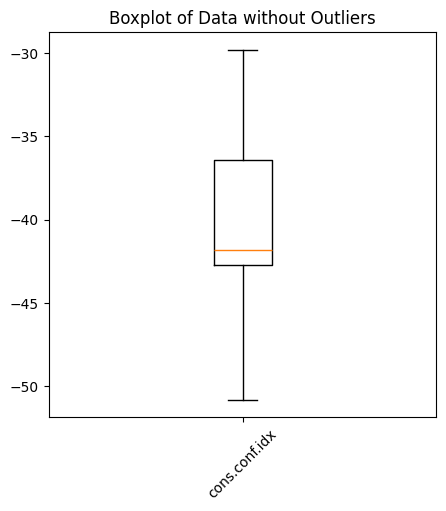

In [17]:
test_cleaned_data = remove_outliers_box(test, ['cons.conf.idx'])

plt.figure(figsize=(5, 5))
plt.boxplot(test_cleaned_data['cons.conf.idx'].values)
plt.xticks(ticks=range(1, 2), labels=['cons.conf.idx'], rotation=45)
plt.title('Boxplot of Data without Outliers')
plt.show()

In [18]:
train = cleaned_data
train['age'] = train['age'].astype(int)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
32946,56,NaN,single,basic.9y,no,no,yes,cellular,jul,mon,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,55,admin.,married,high.school,no,yes,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32948,34,services,married,high.school,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no


In [19]:
test = test_cleaned_data
test['age'] = test['age'].astype(int)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,30,services,married,high.school,no,yes,no,telephone,nov,thu,7,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
8234,47,admin.,married,high.school,no,yes,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8235,37,entrepreneur,married,basic.9y,no,no,no,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
8236,47,services,married,high.school,NaN,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


## fill nan

### fill nan proportionally

In [20]:
job_total=pd.DataFrame(train['job'].value_counts())

job_dict = {job: 0 for job in train['job'].unique() if job != 'nan'}

for job in train['job'].unique():
  train_ = train[train['job'] == job]
  job_dict[job] = len(train_) / len(train['job'].values)

job_dict = {k: f"{v:.2f}" for k, v in job_dict.items()}
print(job_dict)

job_null = train['job'].isnull().sum()

job_count = {job: 0 for job in train['job'].unique()}

for key in job_dict.keys():
  job_count[key] = job_null * float(job_dict[key])

job_count = {k: f"{v:.2f}" for k, v in job_count.items()}
print(job_count)

{'admin.': '0.25', 'technician': '0.16', 'services': '0.10', 'retired': '0.04', 'entrepreneur': '0.04', 'blue-collar': '0.22', 'unemployed': '0.02', 'student': '0.02', 'self-employed': '0.03', 'management': '0.07', 'housemaid': '0.03', nan: '0.00'}
{'admin.': '64.25', 'technician': '41.12', 'services': '25.70', 'retired': '10.28', 'entrepreneur': '10.28', 'blue-collar': '56.54', 'unemployed': '5.14', 'student': '5.14', 'self-employed': '7.71', 'management': '17.99', 'housemaid': '7.71', nan: '0.00'}


In [21]:
train_job_null = train[train['job'].isna()]

train_job_null.iloc[0:65, 1] = 'admin.'
train_job_null.iloc[65:107, 1] = 'technician'
train_job_null.iloc[107:134, 1] = 'services'
train_job_null.iloc[134:144, 1] = 'retired'
train_job_null.iloc[144:154, 1] = 'entrepreneur'
train_job_null.iloc[154:212, 1] = 'blue-collar'
train_job_null.iloc[212:217, 1] = 'unemployed'
train_job_null.iloc[217:222, 1] = 'student'
train_job_null.iloc[222:230, 1] = 'self-employed'
train_job_null.iloc[230:249, 1] = 'management'
train_job_null.iloc[249:257, 1] = 'housemaid'

In [22]:
train = train.dropna(subset = ['job'])
train = pd.concat([train, train_job_null], axis = 0, ignore_index = True)

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,53,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
32946,44,housemaid,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32947,48,housemaid,married,NaN,NaN,yes,no,cellular,jul,mon,7,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,60,housemaid,married,university.degree,no,yes,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [23]:
marital_total=pd.DataFrame(train['marital'].value_counts())

marital_dict = {i: 0 for i in train['marital'].unique()}

for i in train['marital'].unique():
  train_ = train[train['marital'] == i]
  marital_dict[i] = len(train_) / len(train['marital'].values)

marital_dict = {k: f"{v:.2f}" for k, v in marital_dict.items()}
print(marital_dict)

marital_null = train['marital'].isnull().sum()

marital_count = {i: 0 for i in train['marital'].unique()}

for key in marital_dict.keys():
  marital_count[key] = marital_null * float(marital_dict[key])

marital_count = {k: f"{v:.2f}" for k, v in marital_count.items()}
print(marital_count)

{'married': '0.61', 'single': '0.28', 'divorced': '0.11', nan: '0.00'}
{'married': '37.82', 'single': '17.36', 'divorced': '6.82', nan: '0.00'}


In [24]:
train_marital_null = train[train['marital'].isna()]

train_marital_null.iloc[0:38, 2] = 'married'
train_marital_null.iloc[38:55, 2] = 'single'
train_marital_null.iloc[55:62, 2] = 'divorced'

In [25]:
train = train.dropna(subset = ['marital'])
train = pd.concat([train, train_marital_null], axis = 0, ignore_index = True)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32946,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,49,technician,divorced,NaN,NaN,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [26]:
train['default'] = train['default'].fillna('no')
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,no,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32946,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,49,technician,divorced,NaN,no,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [27]:
loan_total=pd.DataFrame(train['loan'].value_counts())

loan_dict = {i: 0 for i in train['loan'].unique()}

for i in train['loan'].unique():
  train_ = train[train['loan'] == i]
  loan_dict[i] = len(train_) / len(train['loan'].values)

loan_dict = {k: f"{v:.2f}" for k, v in loan_dict.items()}
print(loan_dict)

loan_null = train['loan'].isnull().sum()

loan_count = {i: 0 for i in train['loan'].unique()}

for key in loan_dict.keys():
  loan_count[key] = loan_null * float(loan_dict[key])

loan_count = {k: f"{v:.2f}" for k, v in loan_count.items()}
print(loan_count)

{'no': '0.82', 'yes': '0.15', nan: '0.00'}
{'no': '655.18', 'yes': '119.85', nan: '0.00'}


In [28]:
train_loan_null = train[train['loan'].isna()]

train_loan_null.iloc[0:675, 6] = 'no'
train_loan_null.iloc[675:799, 6] = 'yes'

In [29]:
train = train.dropna(subset = ['loan'])
train = pd.concat([train, train_loan_null], axis = 0, ignore_index = True)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,no,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,technician,married,NaN,no,NaN,yes,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
32946,29,retired,married,university.degree,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32947,45,blue-collar,married,NaN,no,NaN,yes,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
32948,44,housemaid,single,basic.9y,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [30]:
train.isnull().sum()

age                  0
job                  0
marital              0
education         1388
default              0
housing            799
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [31]:
test.isnull().sum()

age                  0
job                 73
marital             18
education          343
default           1744
housing            191
loan               191
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [32]:
job_total = pd.DataFrame(test['job'].value_counts())

job_dict = {job: 0 for job in test['job'].unique() if job != 'nan'}

for job in test['job'].unique():
  test_ = test[test['job'] == job]
  job_dict[job] = len(test_) / len(test['job'].values)

job_dict = {k: f"{v:.2f}" for k, v in job_dict.items()}
print(job_dict)

job_null = test['job'].isnull().sum()

job_count = {job: 0 for job in test['job'].unique()}

for key in job_dict.keys():
  job_count[key] = job_null * float(job_dict[key])

job_count = {k: f"{v:.2f}" for k, v in job_count.items()}
print(job_count)

{'admin.': '0.25', 'entrepreneur': '0.03', 'unemployed': '0.02', 'services': '0.10', 'blue-collar': '0.22', 'housemaid': '0.02', 'self-employed': '0.03', 'retired': '0.04', 'technician': '0.17', 'management': '0.07', 'student': '0.02', nan: '0.00'}
{'admin.': '18.25', 'entrepreneur': '2.19', 'unemployed': '1.46', 'services': '7.30', 'blue-collar': '16.06', 'housemaid': '1.46', 'self-employed': '2.19', 'retired': '2.92', 'technician': '12.41', 'management': '5.11', 'student': '1.46', nan: '0.00'}


In [33]:
test_job_null = test[test['job'].isna()]

test_job_null.iloc[0:19, 1] = 'admin.'
test_job_null.iloc[19:32, 1] = 'technician'
test_job_null.iloc[32:40, 1] = 'services'
test_job_null.iloc[40:43, 1] = 'retired'
test_job_null.iloc[43:45, 1] = 'entrepreneur'
test_job_null.iloc[45:62, 1] = 'blue-collar'
test_job_null.iloc[62:63, 1] = 'unemployed'
test_job_null.iloc[63:64, 1] = 'student'
test_job_null.iloc[64:66, 1] = 'self-employed'
test_job_null.iloc[66:71, 1] = 'management'
test_job_null.iloc[71:73, 1] = 'housemaid'

In [34]:
test = test.dropna(subset = ['job'])
test = pd.concat([test, test_job_null], axis = 0, ignore_index = True)

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,55,management,married,basic.4y,NaN,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8234,48,management,married,basic.6y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8235,34,management,married,basic.4y,no,yes,no,cellular,apr,thu,1,999,0,nonexistent,-1.8,93.075,-47.1,1.406,5099.1,yes
8236,44,housemaid,divorced,NaN,no,no,no,cellular,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [35]:
marital_total=pd.DataFrame(test['marital'].value_counts())

marital_dict = {i: 0 for i in test['marital'].unique()}

for i in test['marital'].unique():
  test_ = test[test['marital'] == i]
  marital_dict[i] = len(test_) / len(test['marital'].values)

marital_dict = {k: f"{v:.2f}" for k, v in marital_dict.items()}
print(marital_dict)

marital_null = test['marital'].isnull().sum()

marital_count = {i: 0 for i in test['marital'].unique()}

for key in marital_dict.keys():
  marital_count[key] = marital_null * float(marital_dict[key])

marital_count = {k: f"{v:.2f}" for k, v in marital_count.items()}
print(marital_count)

{'married': '0.60', 'divorced': '0.11', 'single': '0.29', nan: '0.00'}
{'married': '10.80', 'divorced': '1.98', 'single': '5.22', nan: '0.00'}


In [36]:
test_marital_null = test[test['marital'].isna()]

test_marital_null.iloc[0:11, 2] = 'married'
test_marital_null.iloc[11:16, 2] = 'single'
test_marital_null.iloc[16:18, 2] = 'divorced'

In [37]:
test = test.dropna(subset = ['marital'])
test = pd.concat([test, test_marital_null], axis = 0, ignore_index = True)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,54,housemaid,single,basic.4y,no,yes,no,cellular,jul,wed,13,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8234,37,blue-collar,single,basic.6y,NaN,no,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
8235,31,entrepreneur,single,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-29.8,0.722,5017.5,yes
8236,66,retired,divorced,basic.9y,no,yes,no,cellular,aug,wed,3,999,2,failure,-2.9,92.201,-31.4,0.879,5076.2,yes


In [38]:
test['default'] = test['default'].fillna('no')
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,no,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,54,housemaid,single,basic.4y,no,yes,no,cellular,jul,wed,13,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8234,37,blue-collar,single,basic.6y,no,no,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
8235,31,entrepreneur,single,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-29.8,0.722,5017.5,yes
8236,66,retired,divorced,basic.9y,no,yes,no,cellular,aug,wed,3,999,2,failure,-2.9,92.201,-31.4,0.879,5076.2,yes


In [39]:
loan_total=pd.DataFrame(test['loan'].value_counts())

loan_dict = {i: 0 for i in test['loan'].unique()}

for i in test['loan'].unique():
  test_ = test[test['loan'] == i]
  loan_dict[i] = len(test_) / len(test['loan'].values)

loan_dict = {k: f"{v:.2f}" for k, v in loan_dict.items()}
print(loan_dict)

loan_null = test['loan'].isnull().sum()

loan_count = {i: 0 for i in test['loan'].unique()}

for key in loan_dict.keys():
  loan_count[key] = loan_null * float(loan_dict[key])

loan_count = {k: f"{v:.2f}" for k, v in loan_count.items()}
print(loan_count)

{'no': '0.83', 'yes': '0.15', nan: '0.00'}
{'no': '158.53', 'yes': '28.65', nan: '0.00'}


In [40]:
test_loan_null = test[test['loan'].isna()]

test_loan_null.iloc[0:160, 6] = 'no'
test_loan_null.iloc[160:191, 6] = 'yes'

In [41]:
test = test.dropna(subset = ['loan'])
test = pd.concat([test, test_loan_null], axis = 0, ignore_index = True)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4,43,services,married,high.school,no,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,admin.,single,high.school,no,NaN,yes,cellular,nov,mon,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8234,51,admin.,divorced,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8235,48,blue-collar,married,basic.6y,no,NaN,yes,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
8236,39,admin.,married,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### fill nan with KNN

#### label encoding (categorical variable)

In [42]:
from sklearn.preprocessing import LabelEncoder

columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoders = {}

for col in columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

# print labels and their corresponding encoding values
for col, le in label_encoders.items():
    print(col + ":", le.classes_)

job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: ['divorced' 'married' 'single']
education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]
default: ['no' 'yes']
housing: ['no' 'yes' nan]
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [43]:
train['education'] = train['education'].replace(7, np.nan)
train['housing'] = train['housing'].replace(2, np.nan)

#### knn

In [44]:
from sklearn.impute import KNNImputer

# declare imputer
imputer = KNNImputer(n_neighbors = 5)

filled_train = imputer.fit_transform(train)
filled_train = pd.DataFrame(filled_train, columns = train.columns)

In [45]:
train = filled_train
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,999.0,0.0,1.0,1.4,93.918,-42.7,4.966,5228.1,0.0
1,32.0,0.0,1.0,6.0,0.0,1.0,1.0,0.0,4.0,3.0,1.0,999.0,0.0,1.0,-2.9,92.963,-40.8,1.262,5076.2,1.0
2,36.0,9.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.964,5228.1,0.0
3,30.0,7.0,2.0,3.0,0.0,1.0,1.0,0.0,6.0,1.0,1.0,999.0,2.0,0.0,-1.8,92.893,-46.2,1.299,5099.1,0.0
4,76.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,999.0,1.0,0.0,-1.7,94.027,-38.3,0.886,4991.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44.0,9.0,1.0,4.8,0.0,0.8,1.0,0.0,1.0,3.0,1.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.963,5228.1,0.0
32946,29.0,5.0,1.0,6.0,0.0,0.8,1.0,1.0,6.0,0.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0.0
32947,45.0,1.0,1.0,1.6,0.0,0.8,1.0,1.0,6.0,4.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.859,5191.0,0.0
32948,44.0,3.0,2.0,2.0,0.0,0.4,1.0,1.0,6.0,0.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0.0


In [46]:
train['age'] = train['age'].astype(int)
train['job'] = train['job'].astype(int)
train['marital'] = train['marital'].astype(int)
train['education'] = round(train['education']).astype(int)
train['default'] = train['default'].astype(int)
train['housing'] = round(train['housing']).astype(int)
train['loan'] = train['loan'].astype(int)
train['contact'] = train['contact'].astype(int)
train['month'] = train['month'].astype(int)
train['day_of_week'] = train['day_of_week'].astype(int)
train['campaign'] = train['campaign'].astype(int)
train['pdays'] = train['pdays'].astype(int)
train['previous'] = train['previous'].astype(int)
train['poutcome'] = train['poutcome'].astype(int)

In [47]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoders = {}

for col in columns:
    le = LabelEncoder()
    # train_copy[col] = le.fit_transform(train_copy[col])
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

# print labels and their corresponding encoding values
for col, le in label_encoders.items():
    print(col + ":", le.classes_)

job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: ['divorced' 'married' 'single']
education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]
default: ['no']
housing: ['no' 'yes' nan]
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [48]:
test['education'] = test['education'].replace(7, np.nan)
test['housing'] = test['housing'].replace(2, np.nan)

In [49]:
# declare imputer
imputer = KNNImputer(n_neighbors = 5)

filled_test = imputer.fit_transform(test)
filled_test = pd.DataFrame(filled_test, columns = test.columns)

In [50]:
test = filled_test

In [51]:
test['age'] = test['age'].astype(int)
test['job'] = test['job'].astype(int)
test['marital'] = test['marital'].astype(int)
test['education'] = round(test['education']).astype(int)
test['default'] = test['default'].astype(int)
test['housing'] = round(test['housing']).astype(int)
test['loan'] = test['loan'].astype(int)
test['contact'] = test['contact'].astype(int)
test['month'] = test['month'].astype(int)
test['day_of_week'] = test['day_of_week'].astype(int)
test['campaign'] = test['campaign'].astype(int)
test['pdays'] = test['pdays'].astype(int)
test['previous'] = test['previous'].astype(int)
test['poutcome'] = test['poutcome'].astype(int)
test['y'] = test['y'].astype(int)

In [52]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [53]:
test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Feature Selection - stepwise method

In [54]:
data = train.drop(columns = ['pdays', 'y'], axis = 1)
data -= data.mean(axis = 0)

target = train['y']
target = target.astype(int)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True, random_state = 34)

In [56]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [57]:
import statsmodels.api as sm

# fit y_train and X_train to OLS model
model = sm.OLS(y_train, X_train).fit()
# print model's summary(statistics)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     373.5
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:49:20   Log-Likelihood:                -4205.9
No. Observations:               26360   AIC:                             8448.
Df Residuals:                   26342   BIC:                             8595.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0005      0.000      2.

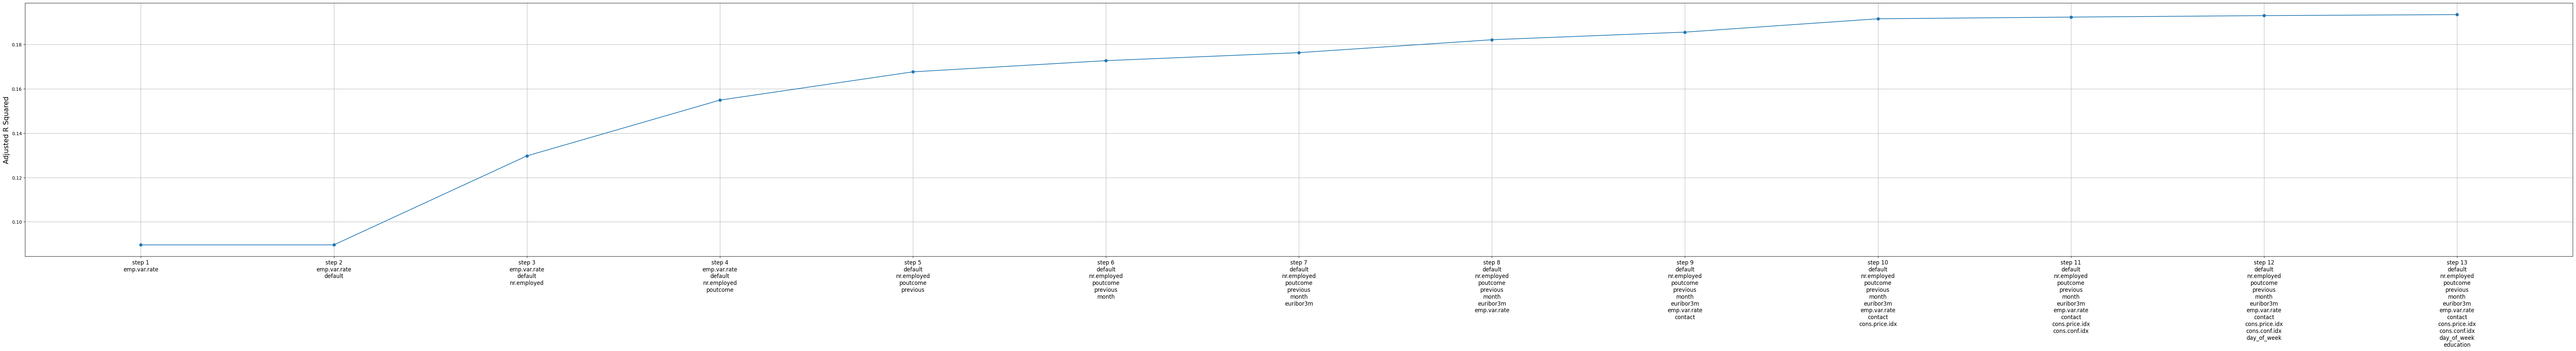

['default', 'nr.employed', 'poutcome', 'previous', 'month', 'euribor3m', 'emp.var.rate', 'contact', 'cons.price.idx', 'cons.conf.idx', 'day_of_week', 'education']


In [58]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):

    y = y_train

    selected_variables = []
    sl_enter = 0.05 # standard p-value to enter the selected_variables
    sl_remove = 0.05 # standard p -value to remove from selected_variables

    sv_per_step = [] # selected variables for each step
    adjusted_r_squared = [] # adjusted R-squared for each step's model
    steps = []
    step = 0

    while len(variables) > 0: # repeat until there is no left feature anymore
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) # initialize Series of p-value of each feature

        # calculate p-values of feature in remainder
        for col in remainder:
            X = X_train[selected_variables+[col]]
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]

        min_pval = pval.min()

        # if p-value is lower than sl_enter, include that feature in selected_variables
        if min_pval < sl_enter:
            selected_variables.append(pval.idxmin())

            # examine whether there is a feature which has higher p-value than sl_remove
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: # remove a feature which has high p-value
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

selected_features = stepwise_feature_selection(X_train, y_train)
print(selected_features)

In [59]:
print(selected_features)

['default', 'nr.employed', 'poutcome', 'previous', 'month', 'euribor3m', 'emp.var.rate', 'contact', 'cons.price.idx', 'cons.conf.idx', 'day_of_week', 'education']


In [60]:
X_train = X_train[selected_features]
X_train

,default,nr.employed,poutcome,previous,month,euribor3m,emp.var.rate,contact,cons.price.idx,cons.conf.idx,day_of_week,education
4990,-0.000091,-67.936495,0.068892,-0.172838,0.774446,-2.062516,-1.883129,-0.366222,-0.73361,-9.468841,-1.003976,-1.582731
2979,-0.000091,28.763505,0.068892,-0.172838,2.774446,0.453484,-0.183129,-0.366222,-0.37661,-1.468841,-0.003976,1.417269
30558,-0.000091,28.763505,0.068892,-0.172838,2.774446,0.568484,-0.183129,-0.366222,-0.37661,-1.468841,-1.003976,-0.582731
24249,-0.000091,61.063505,0.068892,-0.172838,-1.225554,1.338484,1.316871,-0.366222,0.34139,-2.168841,0.996024,1.417269
27929,-0.000091,61.063505,0.068892,-0.172838,-3.225554,1.343484,1.316871,-0.366222,-0.13261,4.431159,-2.003976,-3.582731
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,-0.000091,61.063505,0.068892,-0.172838,-0.225554,1.336484,1.316871,0.633778,0.88839,-1.268841,-2.003976,-3.582731
3157,-0.000091,-67.936495,0.068892,-0.172838,1.774446,-2.378516,-1.883129,-0.366222,-0.68361,-5.668841,-1.003976,2.417269
28406,-0.000091,61.063505,0.068892,-0.172838,-0.225554,1.336484,1.316871,0.633778,0.88839,-1.268841,-2.003976,2.417269
22377,-0.000091,-67.936495,0.068892,-0.172838,1.774446,-2.378516,-1.883129,-0.366222,-0.68361,-5.668841,-1.003976,-0.582731


In [61]:
X_test = X_test[selected_features]
X_test

,default,nr.employed,poutcome,previous,month,euribor3m,emp.var.rate,contact,cons.price.idx,cons.conf.idx,day_of_week,education
11815,-0.000091,61.063505,0.068892,-0.172838,-3.225554,1.345484,1.316871,-0.366222,-0.13261,4.431159,-0.003976,2.417269
29058,-0.000091,-67.936495,0.068892,-0.172838,0.774446,-1.811516,-1.883129,0.633778,-0.73361,-9.468841,-1.003976,2.417269
27393,-0.000091,-67.936495,0.068892,-0.172838,-4.225554,-2.217516,-1.883129,-0.366222,-0.50161,-6.568841,-1.003976,-1.582731
24754,-0.000091,61.063505,0.068892,-0.172838,-1.225554,1.340484,1.316871,-0.366222,0.34139,-2.168841,1.996024,-1.582731
1237,-0.000091,28.763505,0.068892,-0.172838,2.774446,0.568484,-0.183129,-0.366222,-0.37661,-1.468841,-1.003976,2.417269
...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.000091,23.963505,0.068892,-0.172838,1.774446,1.235484,1.016871,0.633778,0.41739,4.131159,1.996024,2.417269
15372,-0.000091,23.963505,0.068892,-0.172838,1.774446,1.232484,1.016871,0.633778,0.41739,4.131159,-0.003976,1.417269
31678,-0.000091,61.063505,0.068892,-0.172838,-0.225554,1.336484,1.316871,0.633778,0.88839,-1.268841,-2.003976,-1.582731
18289,-0.000091,23.963505,0.068892,-0.172838,1.774446,1.233484,1.016871,0.633778,0.41739,4.131159,0.996024,1.417269


In [62]:
test_X = test.drop(columns = ['pdays', 'y'], axis = 1)
test_X -= test_X.mean(axis = 0)

test_target = test['y']
test_target = test_target.astype(int)

In [63]:
test_X = test_X[selected_features]
test_X

,default,nr.employed,poutcome,previous,month,euribor3m,emp.var.rate,contact,cons.price.idx,cons.conf.idx,day_of_week,education
0,0.0,28.766424,0.073926,-0.173464,2.747876,0.57461,-0.176912,-0.361374,-0.371882,-1.454273,-1.007162,2.396213
1,0.0,61.066424,0.073926,-0.173464,-0.252124,1.24761,1.323088,0.638626,0.893118,-1.254273,1.992838,2.396213
2,0.0,-67.933576,0.073926,-0.173464,1.747876,-2.37239,-1.876912,-0.361374,-0.678882,-5.654273,-1.007162,-0.603787
3,0.0,61.066424,0.073926,-0.173464,-3.252124,1.34861,1.323088,-0.361374,-0.127882,4.445727,-1.007162,2.396213
4,0.0,61.066424,0.073926,-0.173464,-0.252124,1.34261,1.323088,0.638626,0.893118,-1.254273,-2.007162,-0.603787
...,...,...,...,...,...,...,...,...,...,...,...,...
8233,0.0,28.766424,0.073926,-0.173464,2.747876,0.57461,-0.176912,-0.361374,-0.371882,-1.454273,-1.007162,-0.603787
8234,0.0,23.966424,0.073926,-0.173464,1.747876,1.24061,1.023088,0.638626,0.422118,4.145727,1.992838,2.396213
8235,0.0,61.066424,0.073926,-0.173464,-0.252124,1.35061,1.323088,0.638626,0.893118,-1.254273,-2.007162,-2.603787
8236,0.0,23.966424,0.073926,-0.173464,1.747876,1.24061,1.023088,0.638626,0.422118,4.145727,1.992838,2.396213


# Model

In [64]:
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings("ignore")

## First Approach: Resampling

In [76]:
def train (learning_rate,max_depth):

  # initialize number of models,
  # list for saving models and predictions,
  # and dataframe for saving P(y=1)

  n= 5
  GB_models=[]
  prob=pd.DataFrame()
  y_pred=[]

  # train model with resampled data
  for i in range(n):
    X_resampled,y_resampled=SMOTE(random_state=i).fit_resample(X_train,y_train) # resample
    model=GradientBoostingClassifier(random_state=i,learning_rate=learning_rate,max_depth=int(max_depth),n_estimators=100,n_iter_no_change=10)
    model.fit(X_resampled,y_resampled)
    GB_models.append(model) # save models in GB_models list

  # return P(y=1), predicted by models in GB_models list
  for trained_model in GB_models:
    y_prob=trained_model.predict_proba(X_test)[:,1]
    prob[f'{trained_model}']=y_prob

  tot_prob=prob.mean(axis=1) # caculate the avg of P(y=1) of all models in GB_models list

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(tot_prob > threshold, 1, 0)

  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[3,25]
           }
optimizer = BayesianOptimization(
    f=train,
    pbounds=pbounds,
    random_state=1,
)

In [77]:
optimizer.maximize(
    init_points=7,
    n_iter=10
)

|   iter    |  target   | learni... | max_depth |
-------------------------------------------------
| 1         | 0.4036    | 0.04176   | 18.85     |
| 2         | 0.4802    | 0.0001114 | 9.651     |
| 3         | 0.4921    | 0.01476   | 5.031     |
| 4         | 0.4772    | 0.01871   | 10.6      |
| 5         | 0.0       | 0.03974   | 14.85     |
| 6         | 0.4041    | 0.04198   | 18.07     |
| 7         | 0.3908    | 0.02052   | 22.32     |
| 8         | 0.4778    | 0.003137  | 3.002     |
| 9         | 0.3916    | 0.03549   | 25.0      |
| 10        | 0.4651    | 0.09251   | 7.191     |
| 11        | 0.4894    | 0.08927   | 4.03      |
| 12        | 0.4643    | 0.099     | 8.389     |
| 13        | 0.4801    | 0.09821   | 6.0       |
| 14        | 0.2032    | 0.09381   | 20.71     |
| 15        | 0.3944    | 0.09849   | 23.63     |
| 16        | 0.0       | 0.09786   | 11.84     |
| 17        | 0.4145    | 0.09719   | 16.86     |


In [352]:
# test
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# train model w/ optimal hyperparameters
model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.01476,
    max_depth=int(5.031),
    n_estimators=100,
    n_iter_no_change=10
)
model.fit(X_resampled, y_resampled)

# predict for real test data, test_X
y_prob = model.predict_proba(test_X)[:, 1]

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_target, y_prob)
f1_scores = 2 * precision * recall / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(best_threshold)

# 임계값 기준으로 예측값 생성
y_pred = (y_prob > best_threshold).astype(int)

# F1 score 계산
final_f1 = f1_score(test_target, y_pred)
print(f"Test Data F1 Score: {final_f1}")

0.8343264239205525
Test Data F1 Score: 0.36028537455410226


## Second Approach: Assign Weights

In [65]:
from lightgbm import LGBMClassifier

def train (learning_rate,max_depth,num_leaves,n_estimators,reg_alpha,reg_lambda):

  # list for saving models and predictions,
  # and dataframe for saving P(y=1)
  y_pred=[]
  
  # train model with parameter 'is_unbalance=True'
  model=LGBMClassifier(learning_rate=learning_rate,
                        max_depth=int(max_depth),is_unbalance=True,verbose=-1,
                       num_leaves=int(num_leaves),n_estimators=int(n_estimators),
                       reg_alpha=reg_alpha,reg_lambda=reg_lambda)

  model.fit(X_train,y_train)

  y_prob=model.predict_proba(X_test)[:,1]

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(y_prob > threshold, 1, 0)

  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1,y_pred,threshold

def train_wrapper(**kwargs):
    f1, _, _ = train(**kwargs)
    return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[10,200],
           'n_estimators':[10,300],
           'num_leaves':[10,100],
           'reg_alpha':[0.0,0.1],
           'reg_lambda':[0,0.1]
           }

optimizer = BayesianOptimization(
    f=train_wrapper,
    pbounds=pbounds,
    random_state=1
)

In [66]:
optimizer.maximize(
    init_points=7,
    n_iter=10
)

|   iter    |  target   | learni... | max_depth | n_esti... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------
| 1         | 0.5       | 0.04176   | 146.9     | 10.03     | 37.21     | 0.01468   | 0.009234  |
| 2         | 0.5043    | 0.01871   | 75.66     | 125.1     | 58.49     | 0.04192   | 0.06852   |
| 3         | 0.5045    | 0.02052   | 176.8     | 17.94     | 70.34     | 0.04173   | 0.05587   |
| 4         | 0.4947    | 0.01412   | 47.64     | 242.2     | 97.14     | 0.03134   | 0.06923   |
| 5         | 0.5039    | 0.08765   | 180.0     | 34.66     | 13.51     | 0.01698   | 0.08781   |
| 6         | 0.5006    | 0.009925  | 90.01     | 287.8     | 57.98     | 0.06919   | 0.03155   |
| 7         | 0.5055    | 0.06868   | 168.6     | 15.3      | 77.51     | 0.09889   | 0.07482   |
| 8         | 0.506     | 0.08415   | 165.0     | 17.53     | 77.1      | 0.09438   | 0.005154  |
| 9         | 0.4976

In [355]:
# best performance using optimal hyperparameters w/ stepwise method
train(learning_rate=0.07209,max_depth=34.73,n_estimators=85.2,num_leaves=10.9,reg_alpha=0.001146,reg_lambda=0.04334)[0]

0.5060532687651331

In [356]:
# train model w/ optimal hyperparameters w/ stepwise method
model = LGBMClassifier(learning_rate=0.08765,
                        max_depth=int(180.0),
                        n_estimators=int(34.66),
                        num_leaves=int(13.51),
                        reg_alpha=0.01698,
                        reg_lambda=0.08781)

model.fit(X_train, y_train)

# predict for real test data, test_X
y_prob = model.predict_proba(test_X)[:, 1]

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_target, y_prob)
f1_scores = 2 * precision * recall / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(best_threshold)

# 임계값 기준으로 예측값 생성
test_y_pred = (y_prob > best_threshold).astype(int)

# F1 score 계산
final_f1 = f1_score(test_target, test_y_pred)
print(f"Test Data F1 Score: {final_f1}")

0.23544154981082002
Test Data F1 Score: 0.5054187192118227


## correct predicted data

In [86]:
y_pred=pd.Series(train(learning_rate=0.07209,max_depth=34.73,n_estimators=85.2,num_leaves=10.9,reg_alpha=0.001146,reg_lambda=0.04334)[1])
y_pred.index = y_test.index

11815    0
29058    1
27393    0
24754    0
1237     0
        ..
7867     0
15372    0
31678    0
18289    0
3859     0
Length: 6590, dtype: int64

In [88]:
correct_indices = (y_test == y_pred)
df = pd.DataFrame(correct_indices)

true_count = int(df.sum())
print(true_count)

5774


In [89]:
# acc
train_acc = (true_count / len(y_test)) * 100
print(f"train_acc: {train_acc:.2f}")

train_acc: 87.62


In [95]:
test_correct_indices = (test_target == test_y_pred)
test_df = pd.DataFrame(test_correct_indices)

test_true_count = int(test_df.sum())
print(test_true_count)

7222


In [96]:
# acc
test_acc = (test_true_count / len(test_target)) * 100
print(f"test acc: {test_acc:.2f}")

test acc: 87.67
